In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_dataset=pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#categorical features-->sex,smoker,region
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Data Analysis and visualization
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

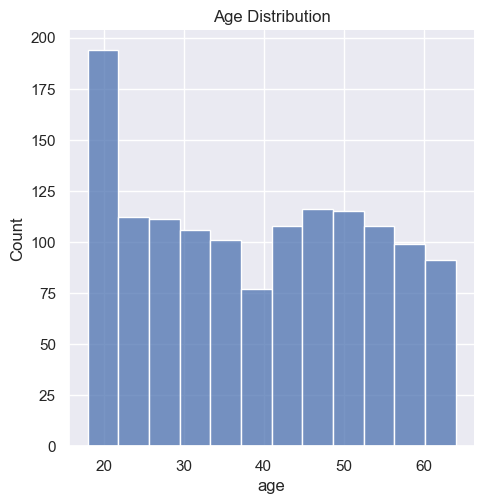

In [9]:
#Distribution for age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

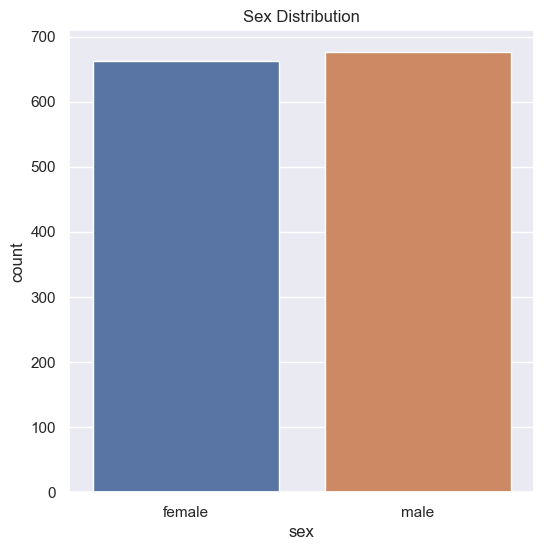

In [10]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

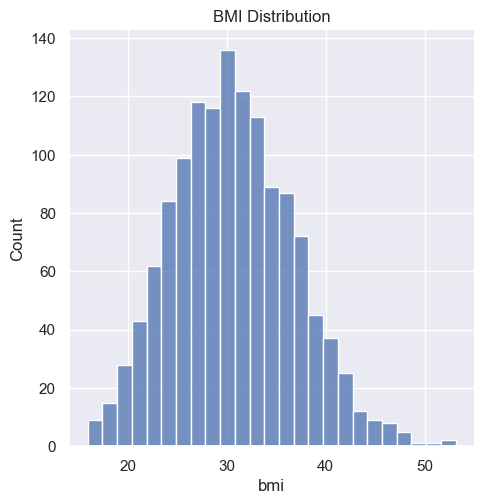

In [13]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

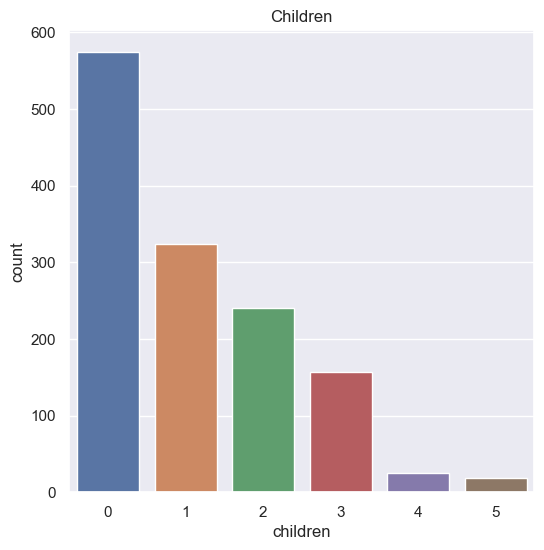

In [14]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

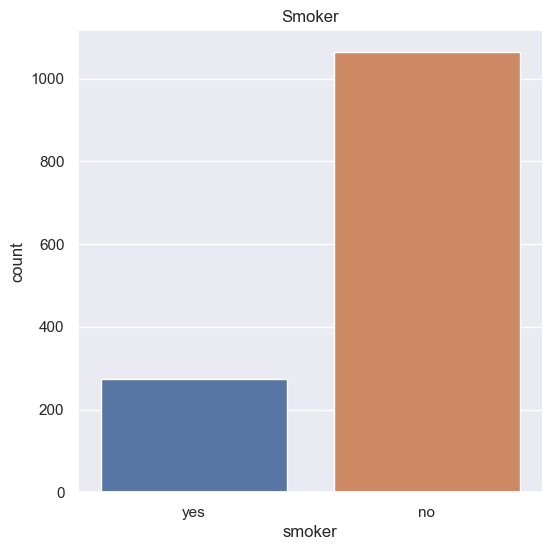

In [16]:
#Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

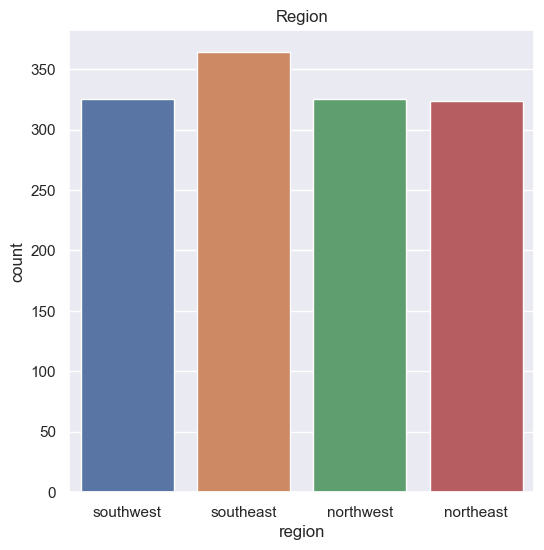

In [18]:
#Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

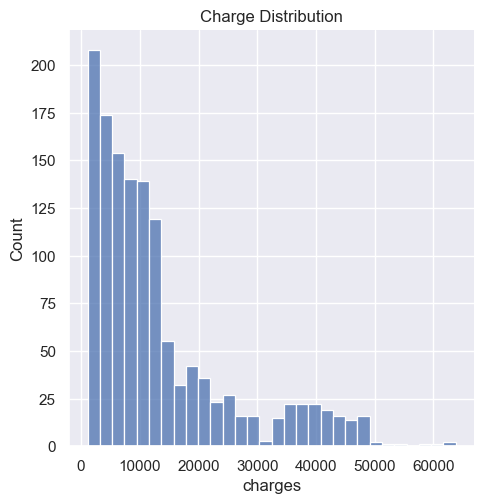

In [21]:
#Charges Column
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

In [22]:
#Data Processing
#Encoding:Converting text features into numerical values
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [23]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


In [25]:
#Splitting the features and target
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [26]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [29]:
#Train_Test_Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
#Model Training
regressor=LinearRegression()


In [31]:
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
#Model Evaluation
training_data_prediction=regressor.predict(x_train)


In [33]:
#R-squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [34]:
print('R-squared value:',r2_train)

R-squared value: 0.751505643411174


In [36]:
test_data_prediction=regressor.predict(x_test)
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R-squared value on test data:',r2_test)

R-squared value on test data: 0.7447273869684077


In [40]:
#Building a predictive system
input_data=(27,0,42.13,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD:',prediction[0])


[32075.73866962]
The insurance cost is USD: 32075.738669618924


/Users/santosbista/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
